# Linear Regression in R

In [1]:
packageurl <- "https://cran.r-project.org/src/contrib/Archive/pbkrtest/pbkrtest_0.4-4.tar.gz"

In [2]:
install.packages(packageurl, repos=NULL, type="source")

In [ ]:
install.packages("car")

In [6]:
library("car")

In [14]:
data("Leinhardt")

In [22]:
?Leinhardt

Leinhardt {carData},R Documentation


In [28]:
head(Leinhardt)

,income,infant,region,oil,loginfant,logincome
,<int>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
Australia,3426,26.7,Asia,no,3.284664,8.139149
Austria,3350,23.7,Europe,no,3.165475,8.116716
Belgium,3346,17.0,Europe,no,2.833213,8.115521
Canada,4751,16.8,Americas,no,2.821379,8.466110
Denmark,5029,13.5,Europe,no,2.602690,8.522976
Finland,3312,10.1,Europe,no,2.312535,8.105308


In [30]:
str(Leinhardt)

'data.frame':	105 obs. of  6 variables:
 $ income   : int  3426 3350 3346 4751 5029 3312 3403 5040 2009 2298 ...
 $ infant   : num  26.7 23.7 17 16.8 13.5 10.1 12.9 20.4 17.8 25.7 ...
 $ region   : Factor w/ 4 levels "Africa","Americas",..: 3 4 4 2 4 4 4 4 4 4 ...
 $ oil      : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ loginfant: num  3.28 3.17 2.83 2.82 2.6 ...
 $ logincome: num  8.14 8.12 8.12 8.47 8.52 ...


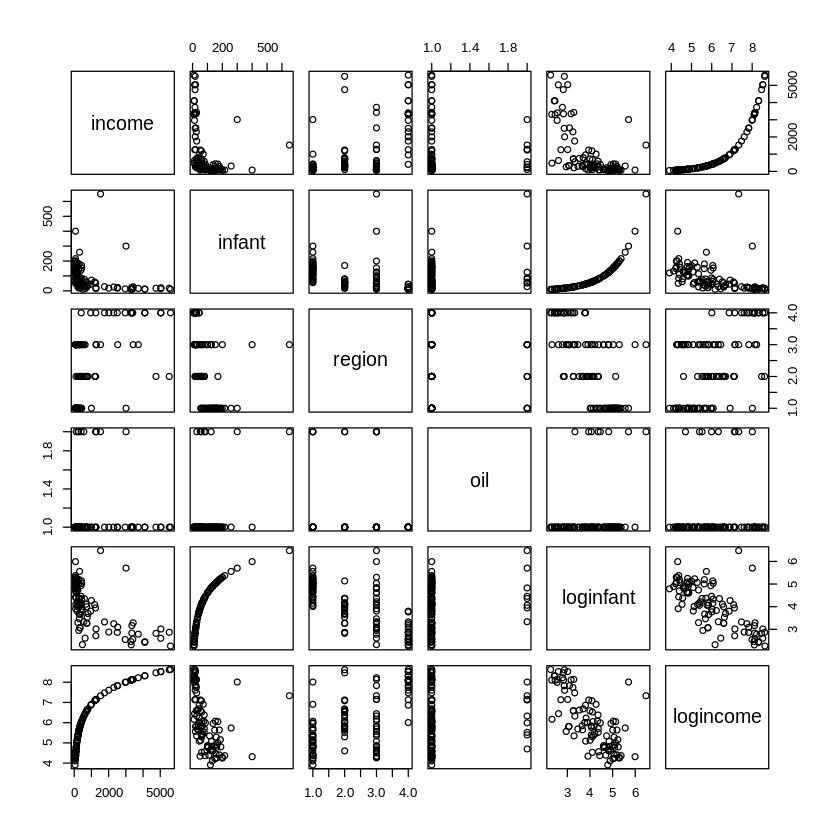

In [32]:
pairs(Leinhardt)

## Linear regression model to relate Infant Mortality to per-capita income

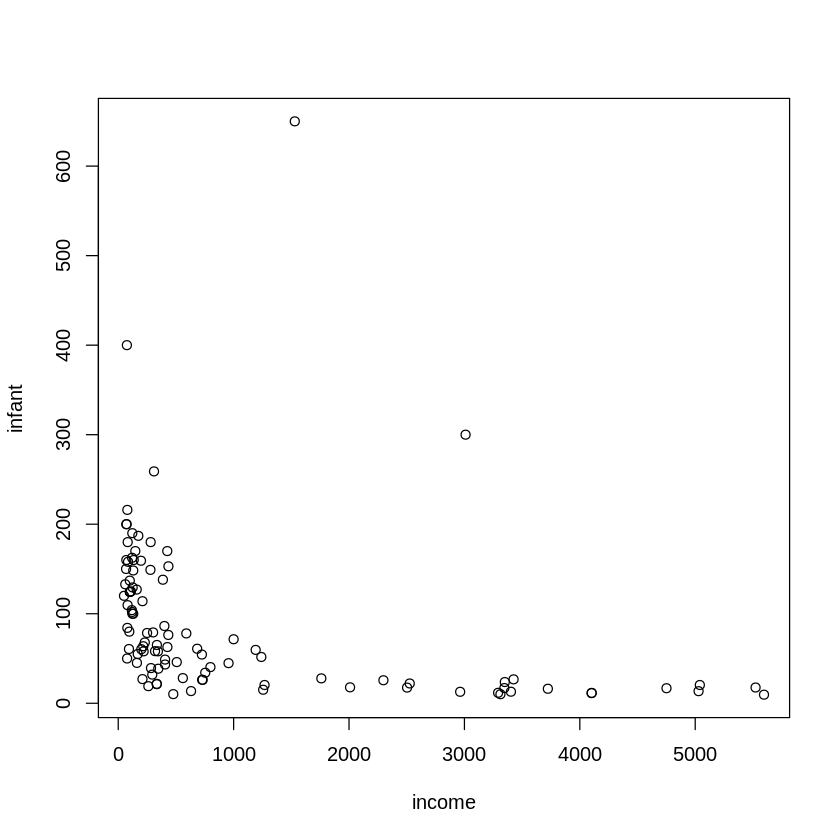

In [34]:
plot(infant ~ income, data = Leinhardt)

It's quite natural to ask that whether a Linear Model would be appropriate for this dataset as the data look extremely right skewed.

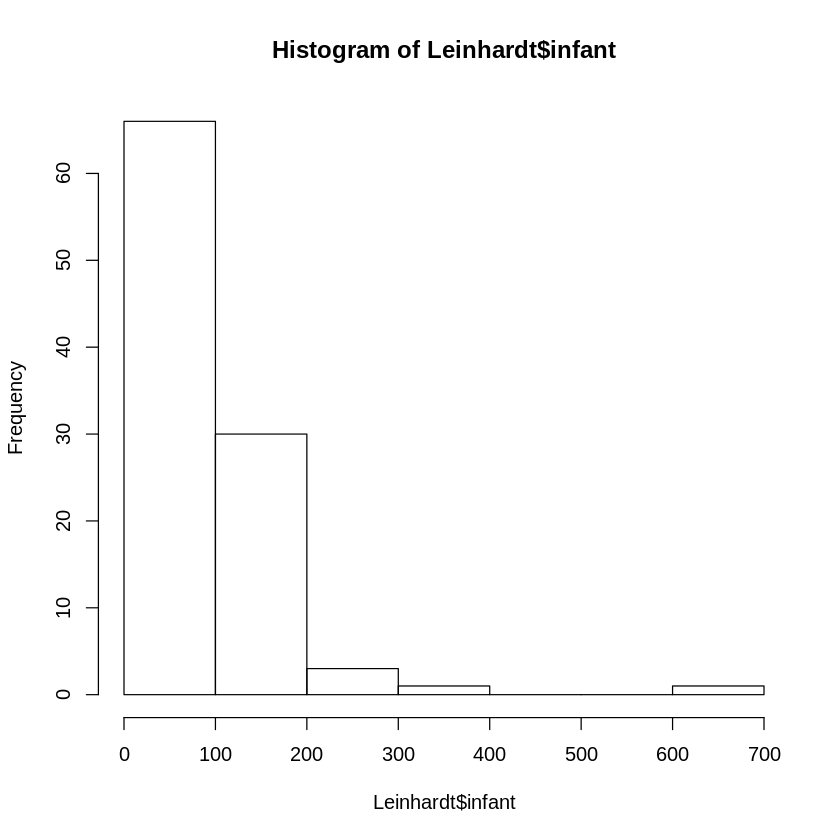

In [36]:
hist(Leinhardt$infant)

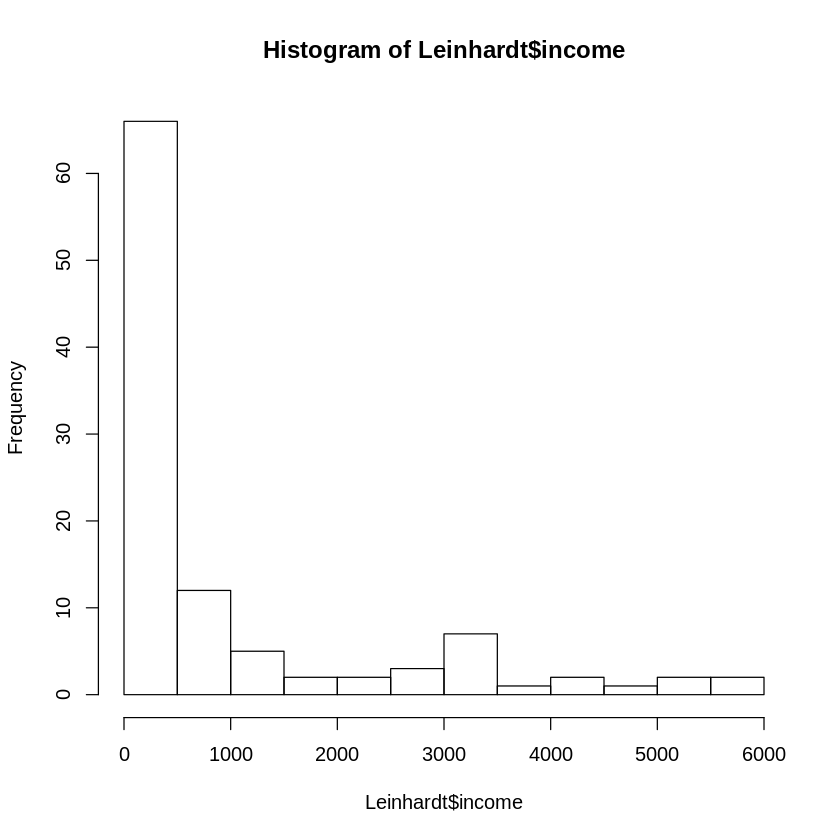

In [38]:
hist(Leinhardt$income)

##### Judging from this, we can directly say that a linear model is not appropriate for this.
##### BUT!! The right skewness of these postive valued parameters tells us that we could look at this on a log scale!

In [40]:
Leinhardt$loginfant = log(Leinhardt$infant)
Leinhardt$logincome = log(Leinhardt$income)

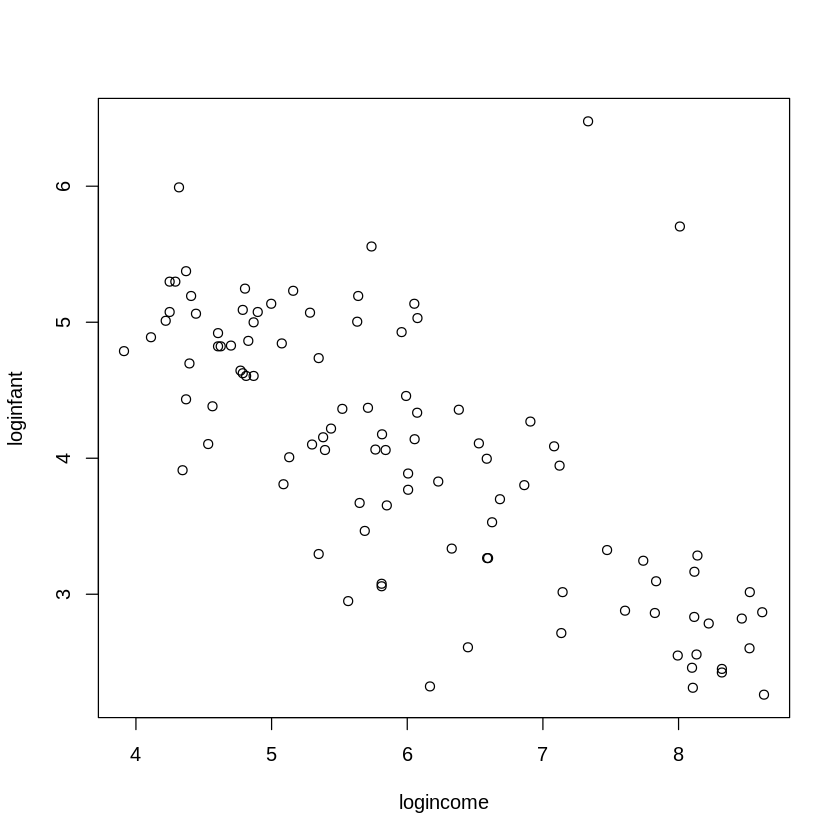

In [41]:
plot(loginfant ~ logincome, data = Leinhardt)

Now it looks like we can fit a model through this.

## Modelling

We'll first create a reference bayesian model with flat prior using $\verb|lm|$ function.

In [42]:
lin_mod = lm(loginfant ~ logincome, data = Leinhardt)

In [43]:
summary(lin_mod)



Call:
lm(formula = loginfant ~ logincome, data = Leinhardt)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.66694 -0.42779 -0.02649  0.30441  3.08415 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.14582    0.31654  22.575   <2e-16 ***
logincome   -0.51179    0.05122  -9.992   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6867 on 99 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.5021,	Adjusted R-squared:  0.4971 
F-statistic: 99.84 on 1 and 99 DF,  p-value: < 2.2e-16


Under our non-informative prior, the posterior mean estimates for the coefficients are given under Estimates.

Residual Standard Error : gives us an estimate of the left over variance after fitting the model

R-squared : How much of the variability is explained by the model

Note the 4 values that were not accounted for the model due to non availabilty of the data points in them.

In [44]:
dat = na.omit(Leinhardt)

In [45]:
Leinhardt

,income,infant,region,oil,loginfant,logincome
,<int>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
Australia,3426,26.7,Asia,no,3.284664,8.139149
Austria,3350,23.7,Europe,no,3.165475,8.116716
Belgium,3346,17.0,Europe,no,2.833213,8.115521
Canada,4751,16.8,Americas,no,2.821379,8.466110
Denmark,5029,13.5,Europe,no,2.602690,8.522976
Finland,3312,10.1,Europe,no,2.312535,8.105308
France,3403,12.9,Europe,no,2.557227,8.132413
West.Germany,5040,20.4,Europe,no,3.015535,8.525161
Ireland,2009,17.8,Europe,no,2.879198,7.605392


## Model in JAGS

In [46]:
library("rjags")

### Linear Regression Model in JAGS

In [47]:
mod1_string = "model {
    
    
    #Likelihood
    for (i in 1:n){
        
        y[i] ~ dnorm(mu[i], prec)
        
        #deterministic linear model
        mu[i] = beta[1] + beta[2]*log_income[i]
        
    }
    
    #Setting Priors
    #1. For Betas 
    for (j in 1:2) {
        
        beta[j] ~ dnorm(0.0, 1 / 1e6)
        
    }
    
    #2. For sigma^2 (We're using Gamma distribution for it, and use it's parameters as 
    #prior sample size = 5, and prior guess for the variance = 10)
    
    prec ~ dgamma(5/2, 5*10/2)
    
    sigma2 = 1 / prec
    
    sigma = sqrt(sigma2)
    
}"

In [48]:
set.seed(91)

In [49]:
data1_jags = list(y = dat$loginfant, n = nrow(dat), log_income = dat$logincome)


#Parameters we want to monitor
params1 = c("beta", "sigma")

#Initial Values for parameters in Likelihood
inits1 = function(){
    inits = list("beta" = rnorm(2,0,100), "prec" = rgamma(1,1,1))
}

#### Model initialization

In [50]:
mod1 = jags.model(textConnection(mod1_string), data = data1_jags, inits = inits1, n.chains = 3)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 101
   Unobserved stochastic nodes: 3
   Total graph size: 404

Initializing model



#### Burn-In Period

In [51]:
update(mod1, 1000)

#### Posterior Simulation for Model Inference

In [52]:
mod1_sim = coda.samples(model = mod1, variable.names = params1, n.iter = 5000)

#### Combining the three chains together

In [53]:
mod1_csim = do.call(rbind, mod1_sim)

In [54]:
summary(mod1_sim[3])


Iterations = 1001:6000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 5000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

           Mean      SD  Naive SE Time-series SE
beta[1]  7.1857 0.46034 0.0065101       0.041859
beta[2] -0.5183 0.07442 0.0010525       0.006716
sigma    0.9710 0.06768 0.0009571       0.001076

2. Quantiles for each variable:

           2.5%     25%     50%     75%  97.5%
beta[1]  6.3102  6.8721  7.1828  7.4957  8.075
beta[2] -0.6631 -0.5671 -0.5171 -0.4676 -0.378
sigma    0.8525  0.9230  0.9662  1.0153  1.112


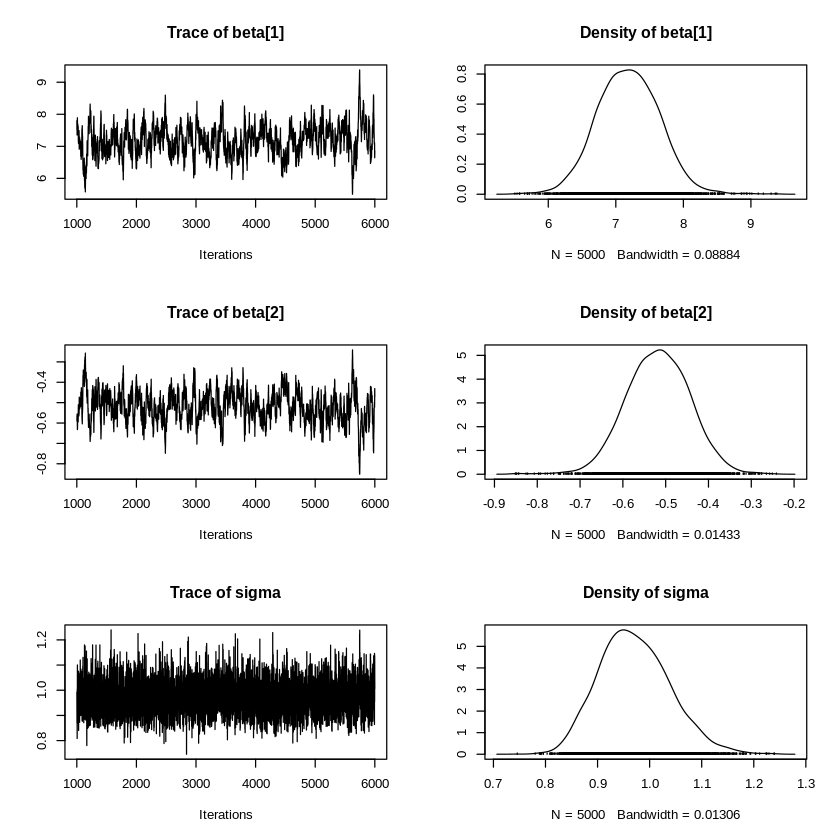

In [55]:
plot(as.mcmc(mod1_sim[3]))

In [56]:
summary(dat)

     income         infant            region    oil       loginfant    
 Min.   :  50   Min.   :  9.60   Africa  :34   no :93   Min.   :2.262  
 1st Qu.: 130   1st Qu.: 26.20   Americas:22   yes: 8   1st Qu.:3.266  
 Median : 334   Median : 60.60   Asia    :27            Median :4.104  
 Mean   :1022   Mean   : 89.05   Europe  :18            Mean   :4.057  
 3rd Qu.:1191   3rd Qu.:129.40                          3rd Qu.:4.863  
 Max.   :5596   Max.   :650.00                          Max.   :6.477  
   logincome    
 Min.   :3.912  
 1st Qu.:4.868  
 Median :5.811  
 Mean   :6.034  
 3rd Qu.:7.083  
 Max.   :8.630  

## Convergence Diagnostics

#### Traceplots

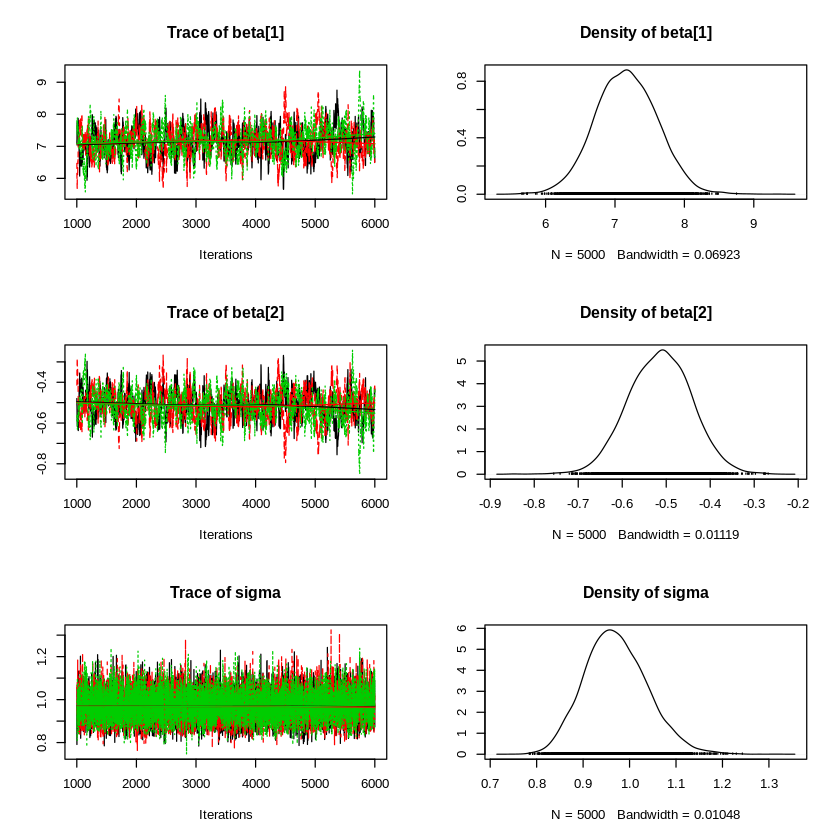

In [57]:
plot(mod1_sim)

We see a long term trends in these plots so they look pretty good

#### Gelman-Rubin Diagnostics

In [59]:
gelman.diag(mod1_sim)

Potential scale reduction factors:

        Point est. Upper C.I.
beta[1]          1       1.01
beta[2]          1       1.01
sigma            1       1.00

Multivariate psrf

1

Potential scale reduction factors are close to 1 so that implies that all of our chains have indeed converged.

#### Autocorrelation

In [60]:
autocorr.diag(mod1_sim)

,beta[1],beta[2],sigma
Lag 0,1.0000000,1.0000000,1.000000000
Lag 1,0.9532485,0.9524860,0.018368330
Lag 5,0.7831477,0.7821284,0.001591076
Lag 10,0.6062177,0.6068002,-0.007431003
Lag 50,0.1015413,0.1021528,0.002892197


We see high correlation for initial lags for all the terms, especially $\verb|beta|$, thus it prompts us to look at effective sample size

#### Effective Sample Size

In [68]:
effectiveSize(mod1_sim)

beta[1]    beta[2]      sigma 
  372.2797   370.3217 13889.1334

Note the above are for 15000 sample size, thus we can conclude that sigma has mixed very well but not beta

In [71]:
summary(mod1_sim)


Iterations = 1001:6000
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 5000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

           Mean      SD  Naive SE Time-series SE
beta[1]  7.1630 0.44691 0.0036490      0.0231597
beta[2] -0.5145 0.07226 0.0005900      0.0037572
sigma    0.9710 0.06763 0.0005522      0.0005772

2. Quantiles for each variable:

           2.5%     25%     50%     75%   97.5%
beta[1]  6.3002  6.8595  7.1577  7.4613  8.0316
beta[2] -0.6556 -0.5634 -0.5133 -0.4653 -0.3759
sigma    0.8485  0.9238  0.9671  1.0147  1.1134


Comparing this to reference model

In [72]:
summary(lin_mod)


Call:
lm(formula = loginfant ~ logincome, data = Leinhardt)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.66694 -0.42779 -0.02649  0.30441  3.08415 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.14582    0.31654  22.575   <2e-16 ***
logincome   -0.51179    0.05122  -9.992   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6867 on 99 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.5021,	Adjusted R-squared:  0.4971 
F-statistic: 99.84 on 1 and 99 DF,  p-value: < 2.2e-16


Note that our flat prior based Linear model gave us the sigma as 0.6867 while our model gave us mean sigma of 0.9710. This comes from our prior guess for equivalent sample size and our belief in it.

## Residual Analysis

Difference Response from the model and true values.

It is good to test whether our assumptions for the data are broken or not i.e. whether the model is not Linear, that it is not Normally distributed, or whether observations are not independent of each other (atleast conditionally)

### Reference Linear Model

Let's look at an example of how the out put shouldn't be like.

In [74]:
lmod0 = lm(infant ~ income, data = Leinhardt)

#### Residual Plot

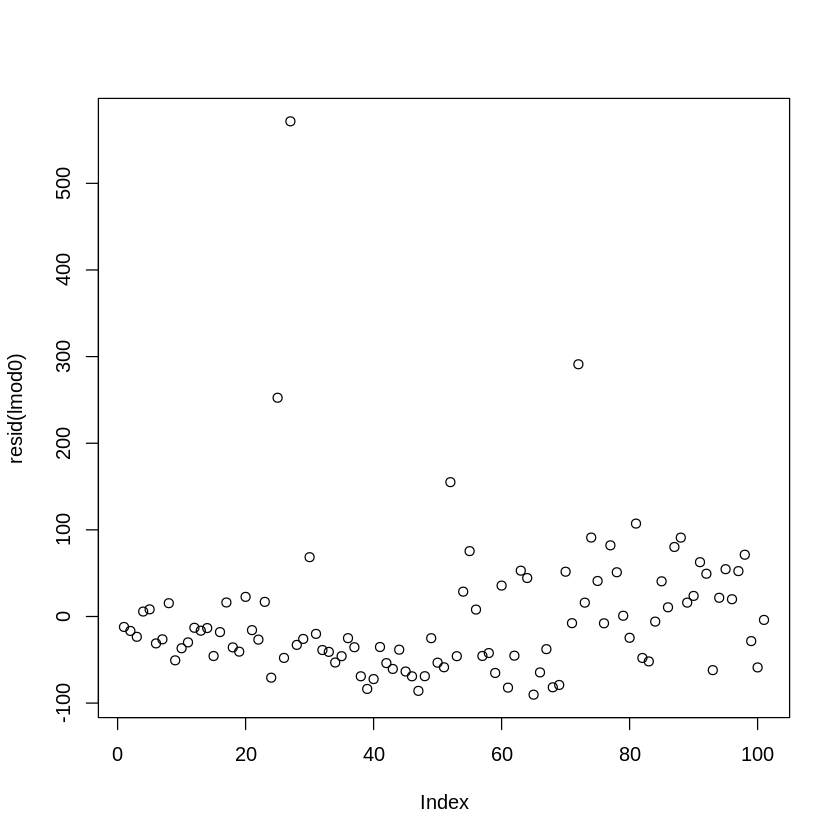

In [75]:
plot(resid(lmod0))

If the residual plot above didn't have a pattern (like above) then we can say that the data are independent. 

#### Predictions vs Residuals

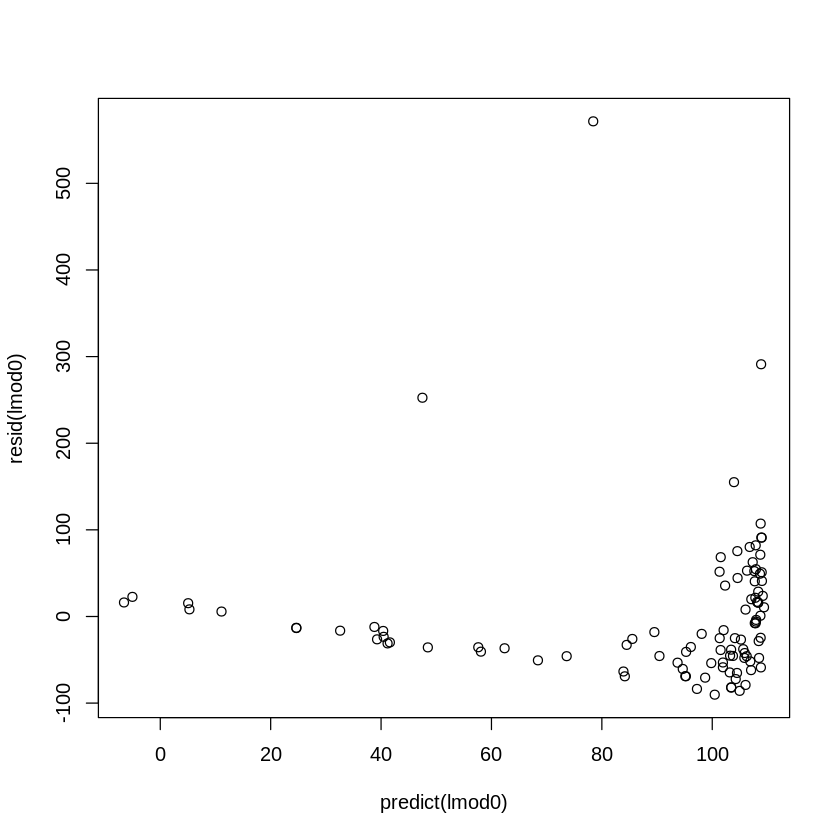

In [78]:
plot(predict(lmod0), resid(lmod0))

We don't want to see any pattern in the above plot, which is not the case this time around (as there is a downward trend).
Also, our assumpton that residual variance is same for all predictions is wildly violated here. 

#### Assumption of Normality

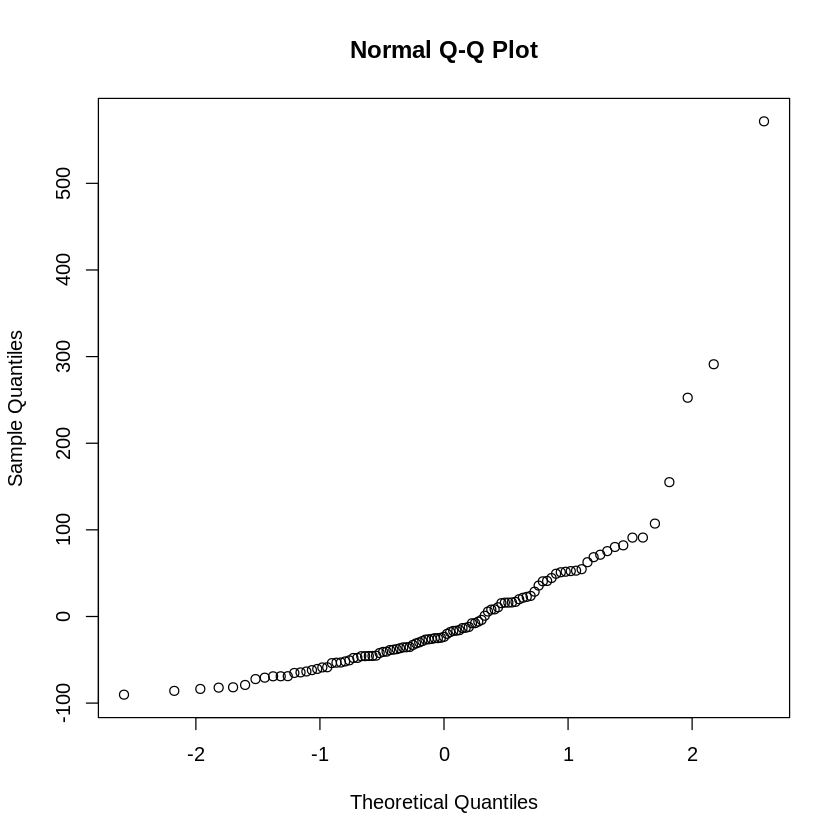

In [80]:
qqnorm(resid(lmod0))

We expect this to be a straight line if we assume that residual also follows a Normal Distribution.

Since the graph isn't linear, thus we can confirm that Residual does not follow a Normal Distribtion.

## Testing Our Model

Predictions from a Bayesian Model comes as a Posterior Predictive Distributions, so in reality each residual will have it's own distribution.

### **We will look at residuals that come only from predictions based on the Posterior Means**

In [83]:
X = cbind(rep(1.0, data1_jags$n), data1_jags$log_income)

In [89]:
head(X)

1,8.139149
1,8.116716
1,8.115521
1,8.466110
1,8.522976
1,8.105308


In [84]:
PostMean_params1 = colMeans(mod1_csim)

In [85]:
PostMean_params1

beta[1]    beta[2]      sigma 
 7.1629748 -0.5145054  0.9709680

In [90]:
y_pred1 = drop( X %*% PostMean_params1[1:2] )

In [91]:
residuals1 = data1_jags$y - y_pred1

#### Residual Plot

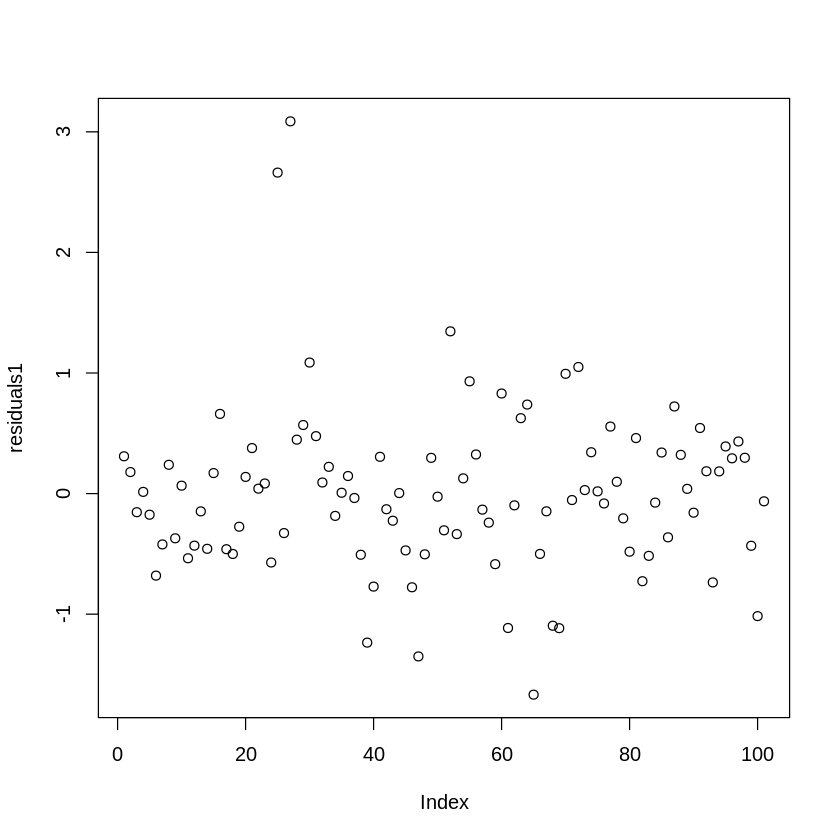

In [92]:
plot(residuals1)

We don't see a trend here thus we can say that data is independent

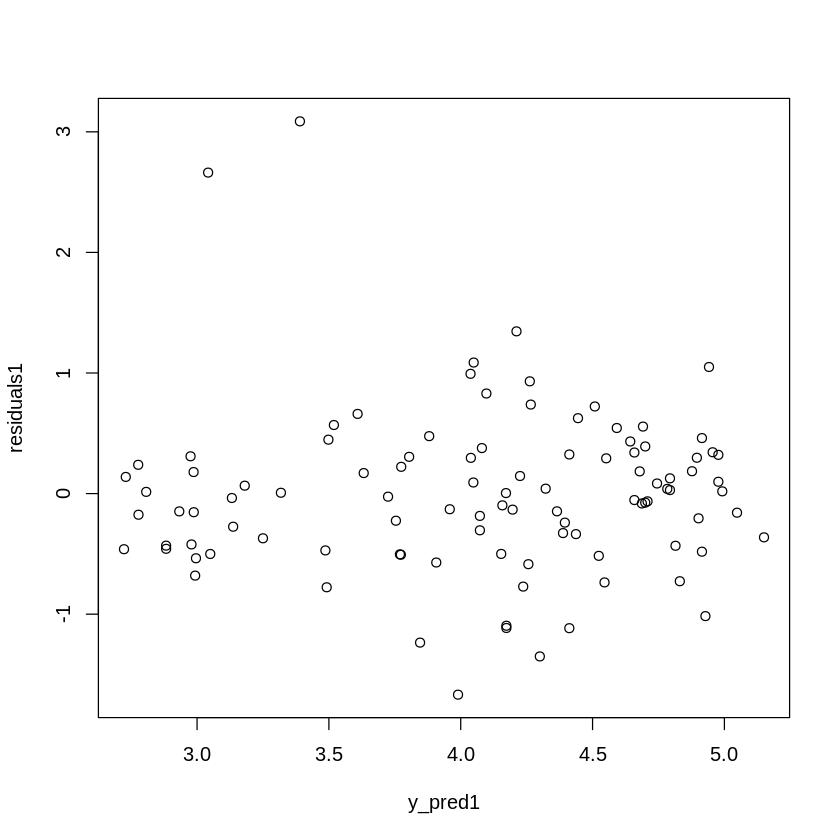

In [93]:
plot(y_pred1, residuals1)

The plot seems straight without any trend, however, there might be a slight concern over slightly increasing variance with increasing predictions and the two outliers

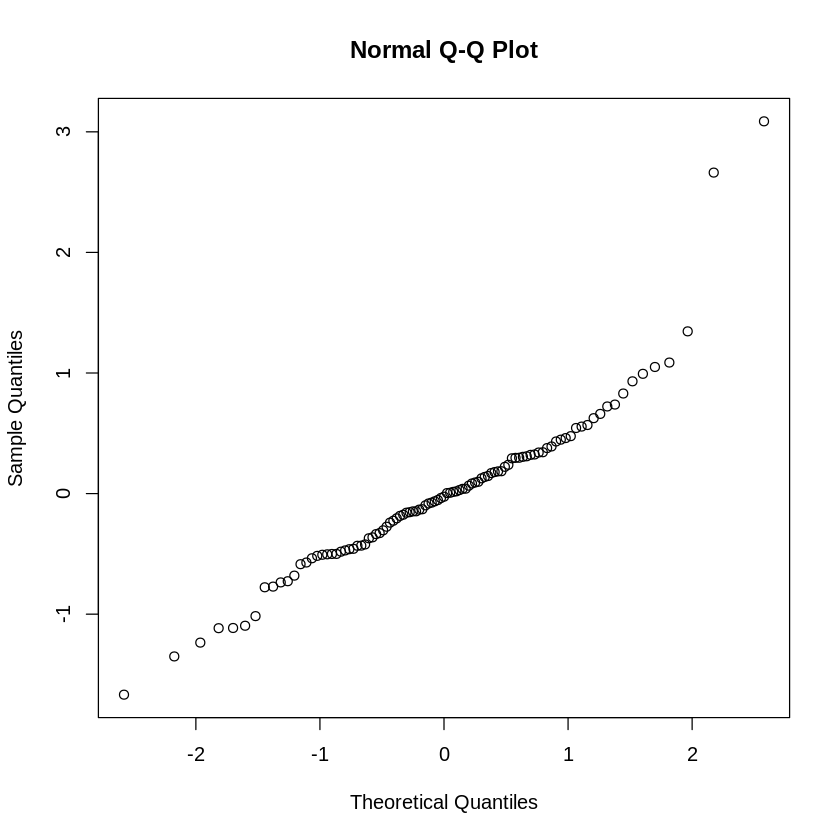

In [94]:
qqnorm(residuals1)

The Normal QQ plot seems linear, thus suggesting that the Residuals are indeed are from Normal Distribution.

However a bit of concern should be raised for the two outliers

#### Outliers

In [96]:
head(rownames(dat)[order(residuals1, decreasing = TRUE)])

[1] "Saudi.Arabia" "Libya"        "Zambia"       "Brazil"       "Afganistan"  
[6] "Turkey"

If you conclude that the outliers are not representative of your data or they just don't belong, then you can justify dropping these from the dataset.

Otherwise, if you conclude that the outliers are indeed part of the data and should not be removed, then there are multiple techniques to accomodate that, which we will look next.

## PART A Quiz Question 3 to 8

In [97]:
data("Anscombe")

In [98]:
?Anscombe

Anscombe {carData},R Documentation


In [99]:
head(Anscombe)

,education,income,young,urban
,<int>,<int>,<dbl>,<int>
ME,189,2824,350.7,508
NH,169,3259,345.9,564
VT,230,3072,348.5,322
MA,168,3835,335.3,846
RI,180,3549,327.1,871
CT,193,4256,341.0,774


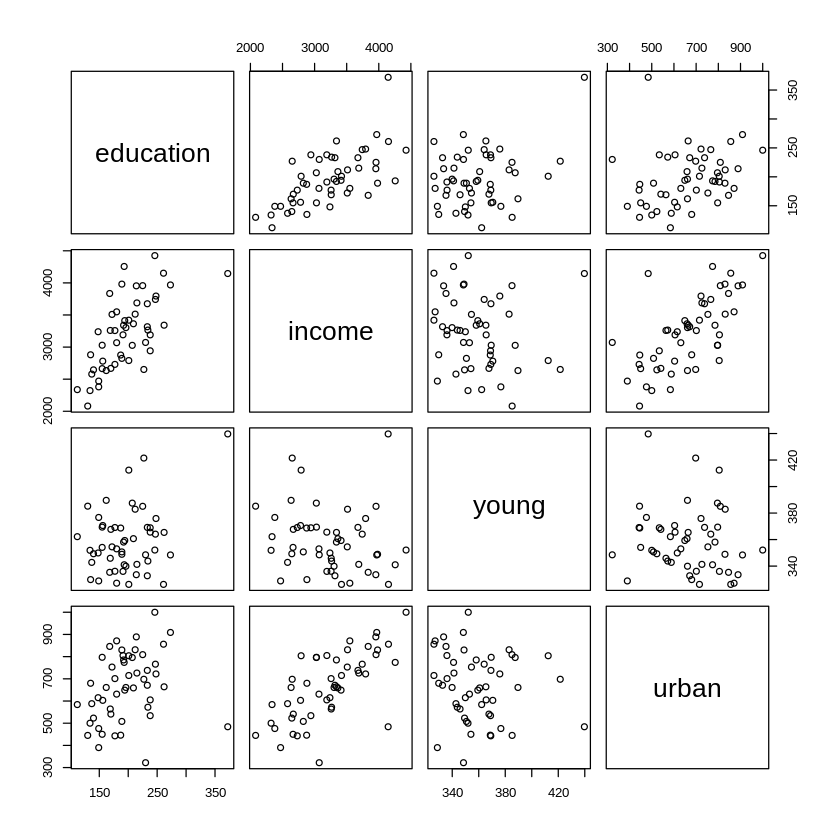

In [101]:
pairs(Anscombe)

In [111]:
ref_lmod = lm(education ~ income+young+urban, data = Anscombe)


In [113]:
summary(ref_lmod)


Call:
lm(formula = education ~ income + young + urban, data = Anscombe)

Residuals:
    Min      1Q  Median      3Q     Max 
-60.240 -15.738  -1.156  15.883  51.380 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.868e+02  6.492e+01  -4.418 5.82e-05 ***
income       8.065e-02  9.299e-03   8.674 2.56e-11 ***
young        8.173e-01  1.598e-01   5.115 5.69e-06 ***
urban       -1.058e-01  3.428e-02  -3.086  0.00339 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.69 on 47 degrees of freedom
Multiple R-squared:  0.6896,	Adjusted R-squared:  0.6698 
F-statistic: 34.81 on 3 and 47 DF,  p-value: 5.337e-12


### Fitting another informative model

In [114]:
mod_string = " model {
    for (i in 1:length(education)) {
        education[i] ~ dnorm(mu[i], prec)
        mu[i] = b0 + b[1]*income[i] + b[2]*young[i] + b[3]*urban[i]
    }
    
    b0 ~ dnorm(0.0, 1.0/1.0e6)
    for (i in 1:3) {
        b[i] ~ dnorm(0.0, 1.0/1.0e6)
    }
    
    prec ~ dgamma(1.0/2.0, 1.0*1500.0/2.0)
    	## Initial guess of variance based on overall
    	## variance of education variable. Uses low prior
    	## effective sample size. Technically, this is not
    	## a true 'prior', but it is not very informative.
    sig2 = 1.0 / prec
    sig = sqrt(sig2)
} "

In [115]:
data_jags = as.list(Anscombe)

In [116]:
set.seed(101)

In [124]:
#Parameters we want to monitor
params1 = c("b0","b", "sig")

#Initial Values for parameters in Likelihood
inits1 = function(){
    inits = list( "b0" = rnorm(1,0,100), "b" = rnorm(3,0,100), "prec" = rgamma(1,1,1))
}

In [125]:
model = jags.model(textConnection(mod_string), data = data_jags, inits = inits1, n.chains = 3)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 51
   Unobserved stochastic nodes: 5
   Total graph size: 422

Initializing model



In [126]:
update(model, 1000)

In [127]:
model_sim = coda.samples(model = model, variable.names = params1, n.iter = 5000)

In [128]:
summary(model_sim)


Iterations = 1001:6000
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 5000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

           Mean       SD  Naive SE Time-series SE
b[1]    0.08141  0.01138 9.288e-05       0.001232
b[2]    0.78750  0.20223 1.651e-03       0.039867
b[3]   -0.11092  0.04043 3.301e-04       0.003406
b0   -275.12069 85.11847 6.950e-01      18.253858
sig    27.65519  2.95454 2.412e-02       0.079498

2. Quantiles for each variable:

           2.5%        25%        50%        75%      97.5%
b[1]    0.05954    0.07362    0.08171    0.08846    0.10476
b[2]    0.45939    0.63718    0.76563    0.91981    1.21246
b[3]   -0.18783   -0.13780   -0.11338   -0.08645   -0.02506
b0   -461.66386 -331.01272 -263.40227 -214.90459 -138.19428
sig    22.65256   25.55455   27.37192   29.51114   34.15364


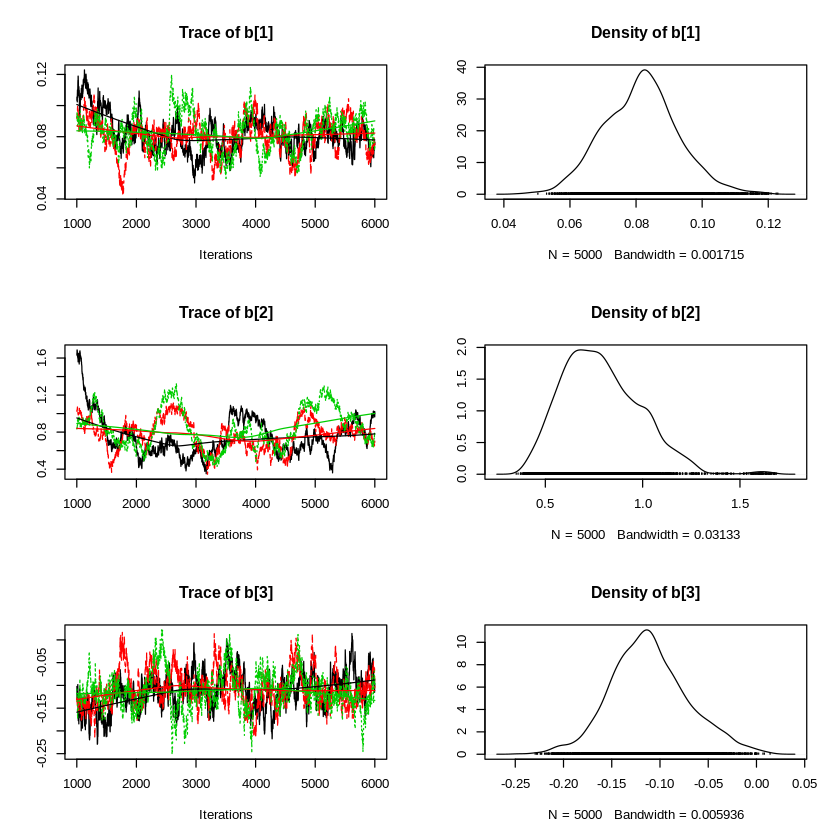

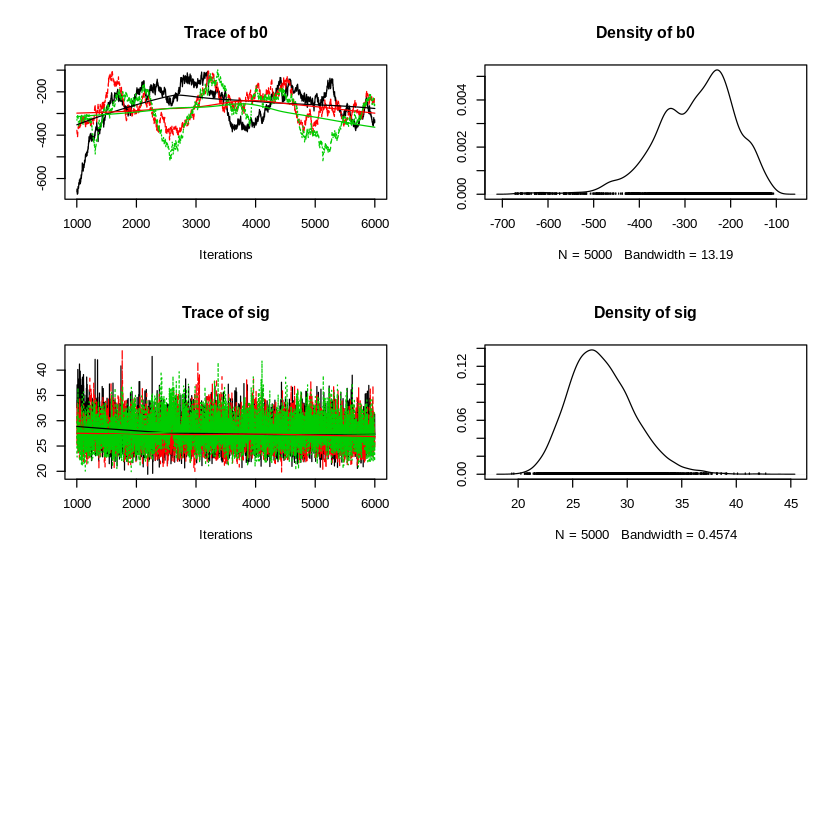

In [129]:
plot(model_sim)

In [130]:
gelman.diag(model_sim)

Potential scale reduction factors:

     Point est. Upper C.I.
b[1]       1.02       1.04
b[2]       1.08       1.23
b[3]       1.01       1.02
b0         1.07       1.20
sig        1.00       1.01

Multivariate psrf

1.05

In [131]:
autocorr.diag(model_sim)

,b[1],b[2],b[3],b0,sig
Lag 0,1.0000000,1.0000000,1.0000000,1.0000000,1.00000000
Lag 1,0.9887319,0.9961056,0.9797256,0.9968994,0.11630278
Lag 5,0.9462702,0.9813286,0.9072567,0.9847427,0.09770616
Lag 10,0.8977182,0.9643357,0.8285592,0.9695199,0.08264323
Lag 50,0.6432156,0.8444793,0.5106714,0.8636371,0.04333953


In [138]:
X = cbind( rep(1.0,nrow(Anscombe)), data_jags$income, data_jags$young, data_jags$urban)

In [139]:
head(X)

1,2824,350.7,508
1,3259,345.9,564
1,3072,348.5,322
1,3835,335.3,846
1,3549,327.1,871
1,4256,341.0,774


In [154]:
model_csim = do.call(rbind, model_sim)
model_params = colMeans(model_csim)

In [155]:
model_params

b[1]         b[2]         b[3]           b0          sig 
   0.0814060    0.7874987   -0.1109226 -275.1206942   27.6551938

In [156]:
y_pred_model = drop( X %*% c(model_params[4], model_params[1], model_params[2], model_params[3]))

In [159]:
summary(model_sim)


Iterations = 1001:6000
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 5000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

           Mean       SD  Naive SE Time-series SE
b[1]    0.08141  0.01138 9.288e-05       0.001232
b[2]    0.78750  0.20223 1.651e-03       0.039867
b[3]   -0.11092  0.04043 3.301e-04       0.003406
b0   -275.12069 85.11847 6.950e-01      18.253858
sig    27.65519  2.95454 2.412e-02       0.079498

2. Quantiles for each variable:

           2.5%        25%        50%        75%      97.5%
b[1]    0.05954    0.07362    0.08171    0.08846    0.10476
b[2]    0.45939    0.63718    0.76563    0.91981    1.21246
b[3]   -0.18783   -0.13780   -0.11338   -0.08645   -0.02506
b0   -461.66386 -331.01272 -263.40227 -214.90459 -138.19428
sig    22.65256   25.55455   27.37192   29.51114   34.15364


In [160]:
summary(ref_lmod)


Call:
lm(formula = education ~ income + young + urban, data = Anscombe)

Residuals:
    Min      1Q  Median      3Q     Max 
-60.240 -15.738  -1.156  15.883  51.380 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.868e+02  6.492e+01  -4.418 5.82e-05 ***
income       8.065e-02  9.299e-03   8.674 2.56e-11 ***
young        8.173e-01  1.598e-01   5.115 5.69e-06 ***
urban       -1.058e-01  3.428e-02  -3.086  0.00339 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.69 on 47 degrees of freedom
Multiple R-squared:  0.6896,	Adjusted R-squared:  0.6698 
F-statistic: 34.81 on 3 and 47 DF,  p-value: 5.337e-12


#### **We can see the parameters our quite close in both informative and non-informative priors (atleast for predictions done on Posterior means)**

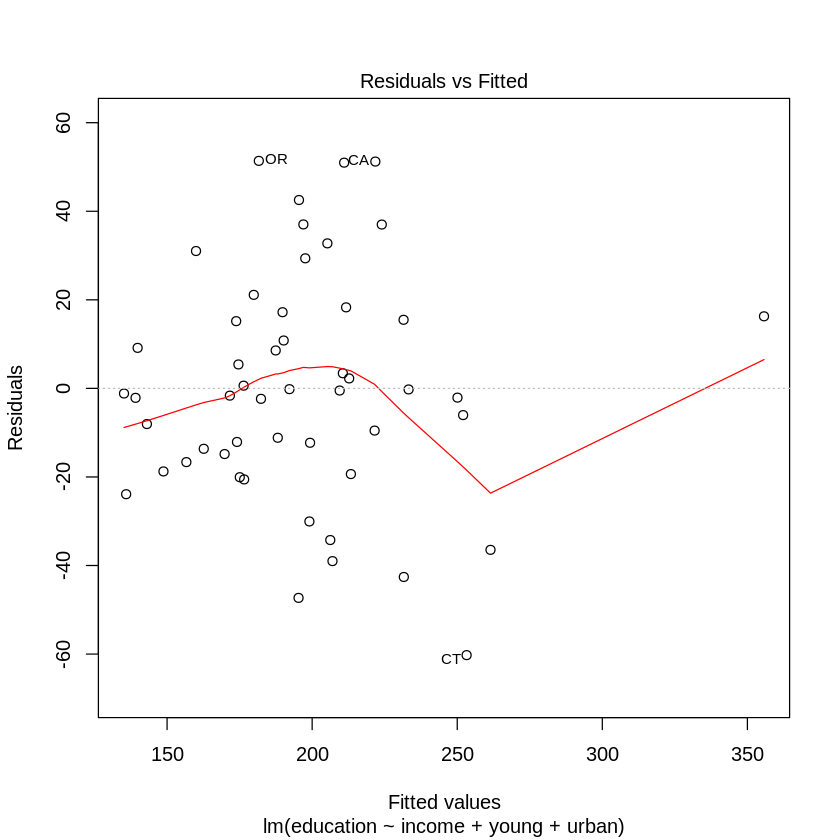

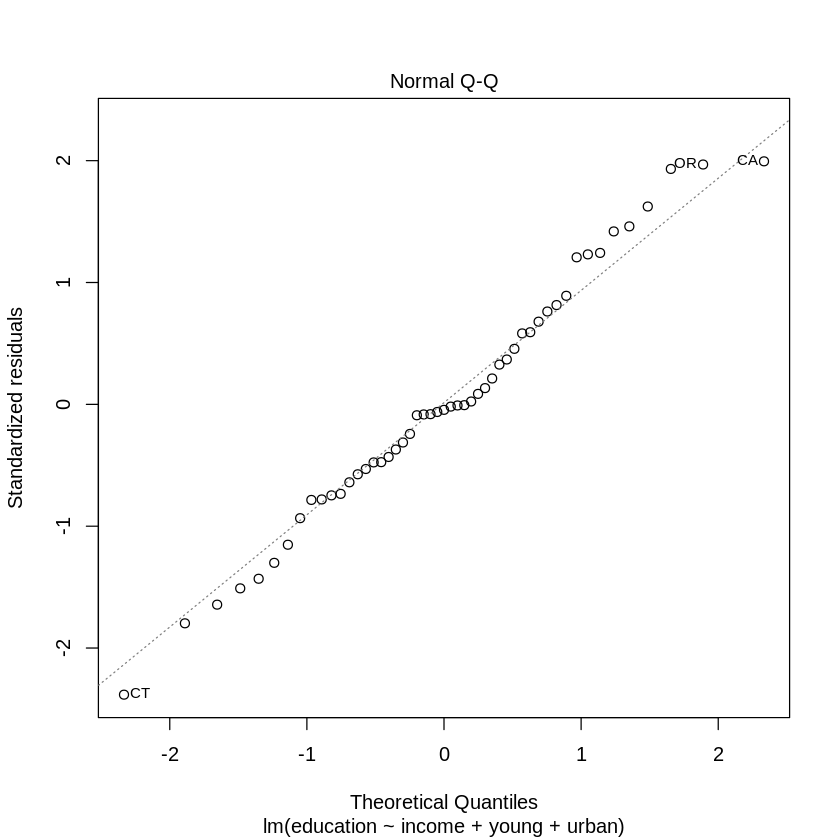

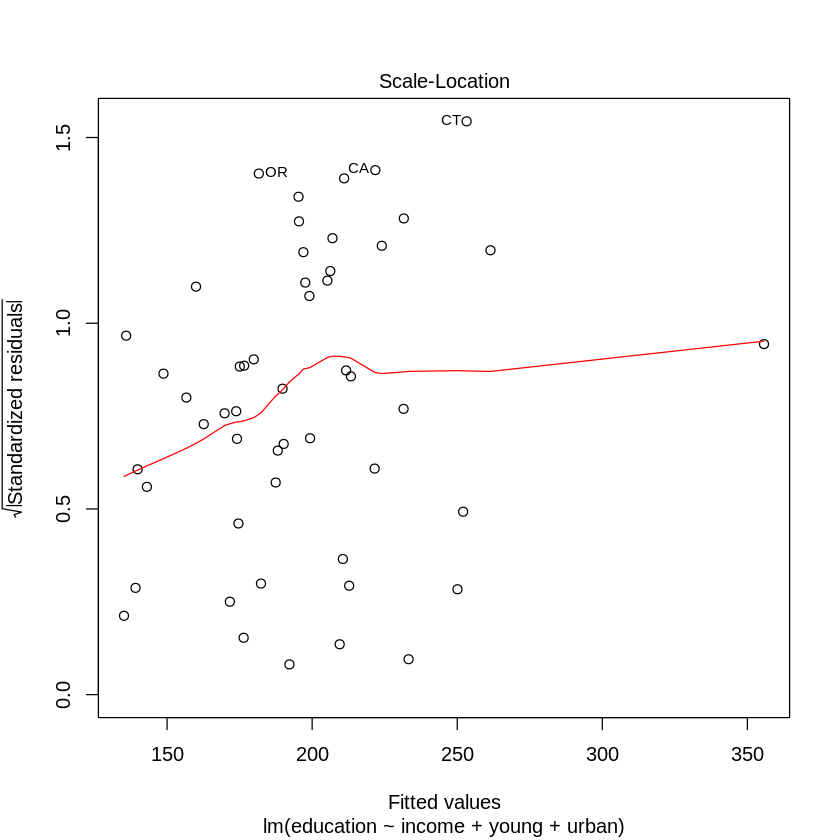

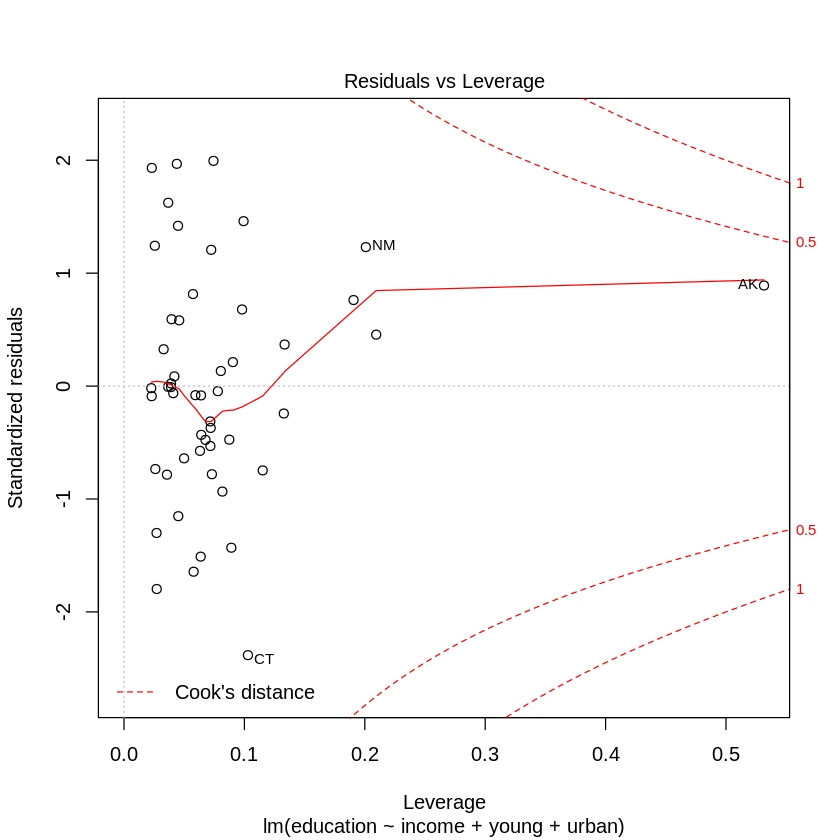

In [161]:
plot(ref_lmod)